# 对比python中不同的图像处理模块
# 并且使用torchvision中的transforms模块进行图像处理

In [2]:
import cv2 as cv
from PIL import Image
from skimage import io, transform

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
image_file = "LenaRGB.jpg"

img_PIL = Image.open(image_file)
img_skimage = io.imread(image_file)
img_opencv = cv.imread(image_file)
img_plt = plt.imread(image_file)

In [8]:
image_transform = transforms.Compose([
  transforms.ToTensor()]) # 转换为torch.tensor格式

In [16]:
print("The shape of \n")
print("img_PIL is {}\n".format(img_PIL.size))
print("img_skimage is {}\n".format(img_skimage.shape))
print("img_opencv is {}\n".format(img_opencv.shape))
print("img_plt is {}\n".format(img_plt.shape))

print('The type of \n img_skimage is {}\n img_opencv is {}\n img_plt is {}\n img_PIL is {}\n'.format(type(img_skimage), type(img_opencv), type(img_plt),type(img_PIL)))

The shape of 

img_PIL is (1024, 1024)

img_skimage is (1024, 1024, 3)

img_opencv is (1024, 1024, 3)

img_plt is (1024, 1024, 3)

The type of 
 img_skimage is <class 'numpy.ndarray'>
 img_opencv is <class 'numpy.ndarray'>
 img_plt is <class 'numpy.ndarray'>
 img_PIL is <class 'PIL.JpegImagePlugin.JpegImageFile'>



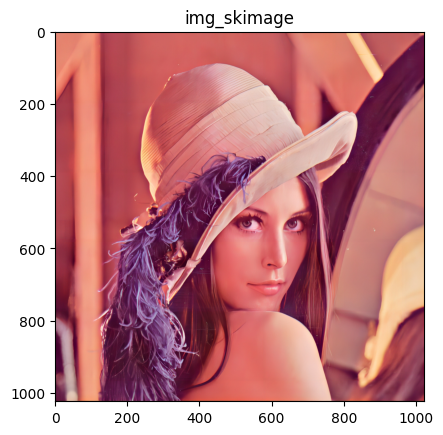

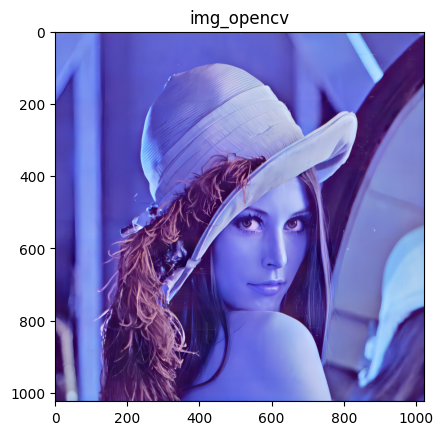

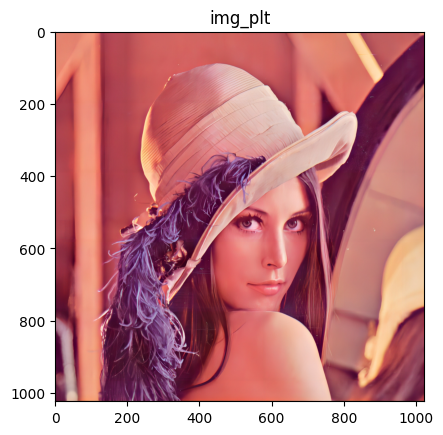

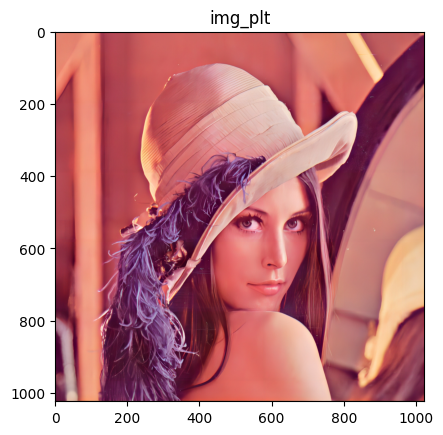

In [18]:
# 定义一个图像显示函数
def my_imshow(image, title=None):
  plt.imshow(image)
  if title is not None:
    plt.title(title)
  plt.pause(0.001) # 这里延时一下，否则图像无法加载

plt.figure()
my_imshow(img_skimage, title='img_skimage')
# 可以看到opencv读取的图像打印出来的颜色明显与其他不同
plt.figure()
my_imshow(img_opencv, title='img_opencv')
plt.figure()
my_imshow(img_plt, title='img_plt')
plt.figure()
my_imshow(img_PIL, title='img_PIL')

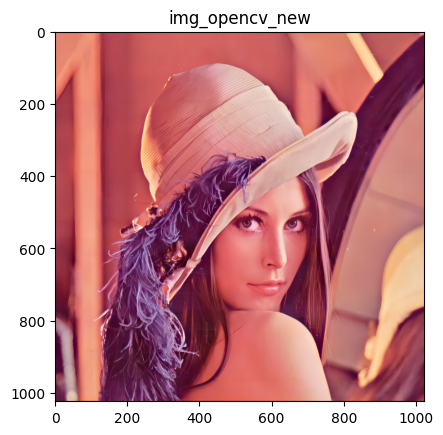

In [20]:
# opencv读出的图像颜色通道为BGR，需要对此进行转换
img_opencv = cv.cvtColor(img_opencv, cv.COLOR_BGR2RGB)
plt.figure()
my_imshow(img_opencv, title='img_opencv_new')

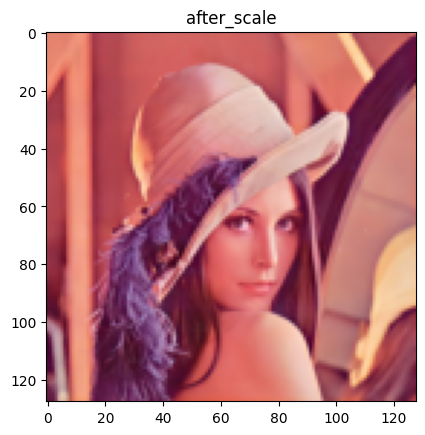

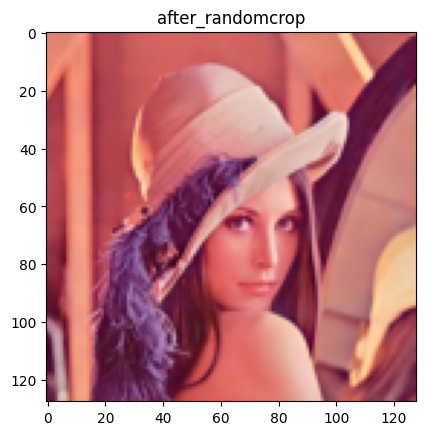

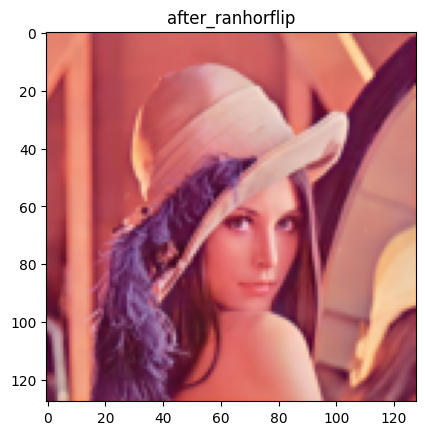

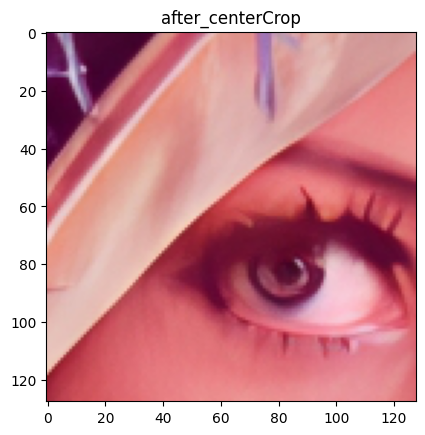

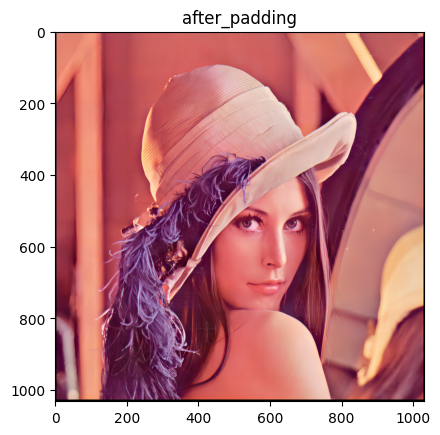

In [23]:

toTensor = transforms.Compose([transforms.ToTensor()])

# 尺寸变化、缩放
transform_scale = transforms.Compose([transforms.Resize(128)])
temp = transform_scale(img_PIL)
plt.figure()
my_imshow(temp, title='after_scale')

# 随机裁剪
transform_randomCrop = transforms.Compose([transforms.RandomCrop(32, padding=4)])
temp = transform_scale(img_PIL)
plt.figure()
my_imshow(temp, title='after_randomcrop')

# 随机进行水平翻转（0.5几率）
transform_ranHorFlip = transforms.Compose([transforms.RandomHorizontalFlip()])
temp = transform_scale(img_PIL)
plt.figure()
my_imshow(temp, title='after_ranhorflip')

# 中心裁剪
transform_centerCrop = transforms.Compose([transforms.CenterCrop(128)])
temp = transform_centerCrop(img_PIL)
plt.figure()
my_imshow(temp, title='after_centerCrop')

# 空白填充
transform_pad = transforms.Compose([transforms.Pad(4)])
temp = transform_pad(img_PIL)
plt.figure()
my_imshow(temp, title='after_padding')